In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
import scipy.stats as sts
from scipy.stats import norm
%matplotlib inline

In [2]:
loc=0
scale=1
laplace_rv = laplace(loc=loc, scale=scale)

In [3]:
#создание выборки объема 1000
sample = laplace_rv.rvs(1000)

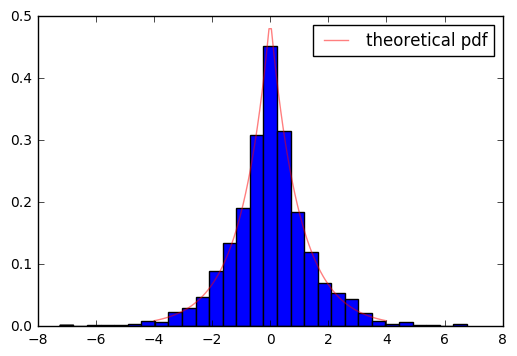

In [4]:
x = np.linspace(-4,4,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5, color='r');
plt.hist(sample, normed=True, bins=30, color='b');
plt.legend();

In [5]:
def create_samples(n):
    sample = list()
    for i in range(0,1000):
        sample.append(laplace_rv.rvs(n))
    return sample

In [6]:
def sample_means(samples):
    sample_means = list()
    for s in samples:
        sample_means.append(np.mean(s))
    return sample_means

In [7]:
def plot_means(means_sample, n):
    plt.hist(means_sample)
    plt.ylabel('$n$')
    plt.xlabel('$x$');
    plt.title('means for n={}'.format(n));

In [8]:
mean_rv = laplace_rv.mean() #мат ожидание
var = laplace_rv.var() #дисперсия
std = np.sqrt(var) #стандартное отклонение

In [9]:
def cpt(means_sample, n):
    cpt_sample = list()
    for m in means_sample:
        x = ((m - mean_rv)/std)*(np.sqrt(n))
        cpt_sample.append(x)
    return cpt_sample

In [10]:
def cpt_plot(cpt_sample,n):
    cpt_sample.sort()
    plt.hist(cpt_sample,normed=True, bins=10)
    pdf = sts.norm.pdf(cpt_sample)
    plt.plot(cpt_sample, pdf, label='normal pdf', alpha=0.5, color='r')
    plt.legend()
    plt.ylabel('$p$')
    plt.xlabel('$x$');
    plt.title('n={}'.format(n));

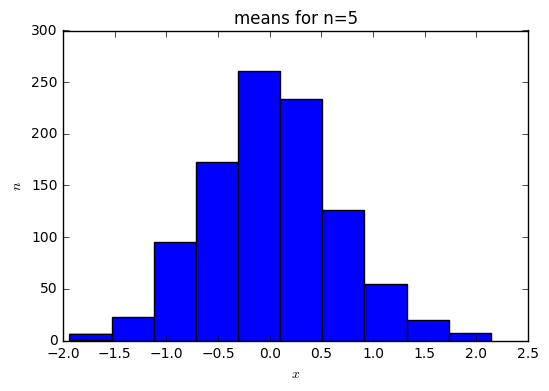

In [11]:
samples_n5 = create_samples(5)
samples_n5_means = sample_means(samples_n5)
plot_means(samples_n5_means, 5)

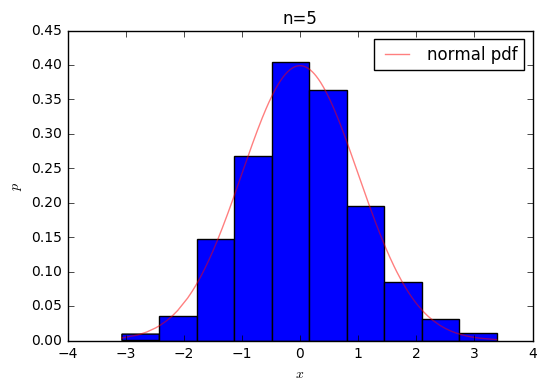

In [12]:
cpt_sample_n5 = cpt(samples_n5_means,5)
cpt_plot(cpt_sample_n5, 5)

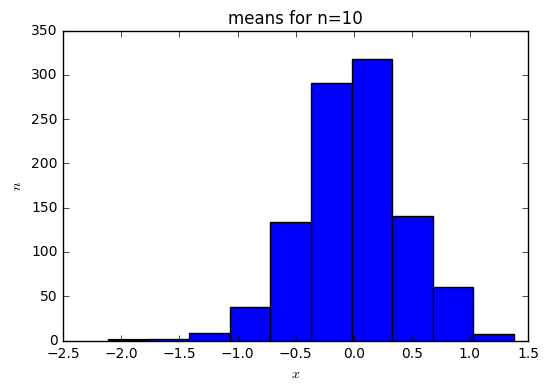

In [13]:
samples_n10 = create_samples(10)
samples_n10_means = sample_means(samples_n10)
plot_means(samples_n10_means, 10)

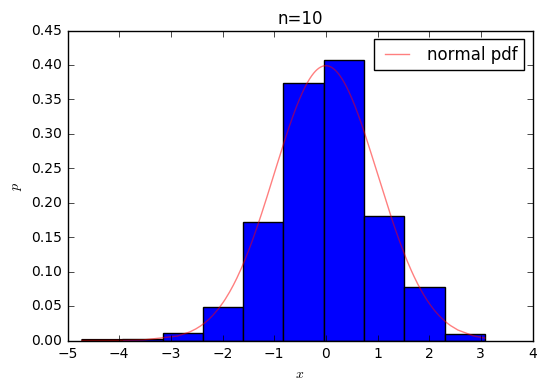

In [14]:
cpt_sample_n10 = cpt(samples_n10_means,10)
cpt_plot(cpt_sample_n10, 10)

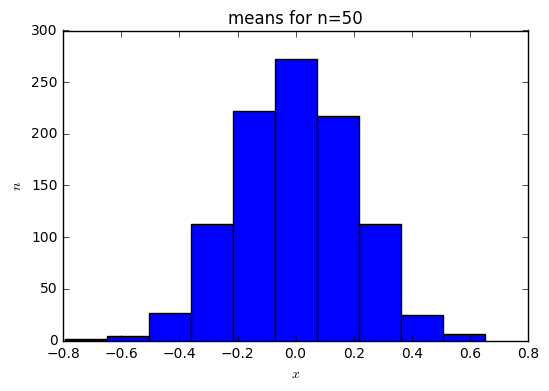

In [15]:
samples_n50 = create_samples(50)
samples_n50_means = sample_means(samples_n50)
plot_means(samples_n50_means, 50)

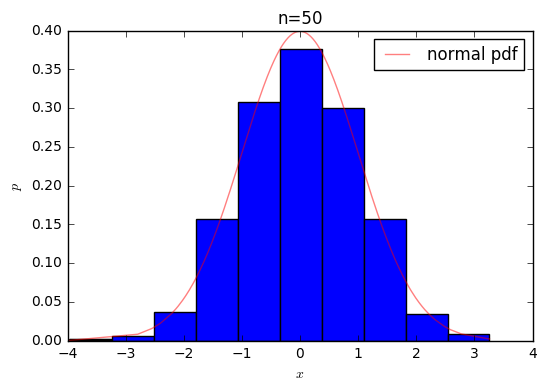

In [16]:
cpt_sample_n50 = cpt(samples_n50_means,50)
cpt_plot(cpt_sample_n50, 50)

В данной работе на примере распределения Лапласса, для которого также были построенны гистограммы распределений выборочных средних для разных объемов выборок, была доказана **Центральная предельная теорема**.


Отмасштабированные выборки действительно имеют вид нормального распределения. При этом точность апроксимации распределения выборочных средних растет с увеличением объема выборок, хоть и на данном примере это не очень заметно.